In [1]:
import os, sys, glob
from datetime import datetime
sys.path.insert(0,'/Users/wujung/Desktop/mi-instrument-master/')

from mi.instrument.kut.ek60.ooicore.zplsc_b import *
from concat_raw_output import *

data_path = '/Users/wujung/ooi_data_80m/'
fname_form = 'OOI-D*.raw'  # index all files in 2015
fname_all = glob.glob(os.path.join(data_path,fname_form))
date_wanted = ['20150901']

idx_date = get_date_idx(date_wanted,fname_all)

In [167]:
particle_data, data_times, power_data_dict, freq, bin_size, config_header, config_transducer = parse_echogram_file(fname_all[idx_date[0]])
data_mtx = get_data_mtx(power_data_dict,freq)

2017-02-02 16:08:47,894 INFO     mi.instrument.kut.ek60.ooicore.zplsc_b Begin processing echogram data: '/Users/wujung/ooi_data_80m/OOI-D20150901-T000000.raw'
2017-02-02 16:08:50,204 INFO     mi.instrument.kut.ek60.ooicore.zplsc_b Completed processing data. Generating echogram: '/Users/wujung/ooi_data_80m/OOI-D20150901-T000000.raw'
2017-02-02 16:08:57,510 INFO     mi.instrument.kut.ek60.ooicore.zplsc_b Completed generating echogram: '/Users/wujung/ooi_data_80m/OOI-D20150901-T000000.raw'


In [168]:
power_data_dict[1].shape

(445, 13668)

In [169]:
data_mtx.shape

(3, 445, 13668)

In [5]:
particle_data

(defaultdict(list,
             {'filepath': 'OOI-D20150901-T000000.png',
              'zplsc_absorption_coeff': [0.037440311,
               0.0097852694,
               0.052687589],
              'zplsc_bandwidth': [3026.3916, 2425.1497, 3088.4004],
              'zplsc_channel': [1, 2, 3],
              'zplsc_frequency': [120000.0, 38000.0, 200000.0],
              'zplsc_pulse_length': [0.001024, 0.001024, 0.001024],
              'zplsc_sample_interval': [0.000256, 0.000256, 0.000256],
              'zplsc_sound_velocity': [1493.8888, 1493.8888, 1493.8888],
              'zplsc_temperature': [10.0, 10.0, 10.0],
              'zplsc_timestamp': '20150901000000',
              'zplsc_transducer_depth': [0.0, 0.0, 0.0],
              'zplsc_transmit_power': [250.0, 500.0, 150.0]}),
 3650054400.0753517)

In [6]:
config_header

{'sounder_name': 'ER60',
 'survey_name': 'OOI',
 'transducer_count': 3,
 'transect_name': '',
 'version': '2.4.3'}

In [7]:
config_transducer

[{'angle_offset_alongship': 0.0,
  'angle_offset_athwart': 0.0,
  'angle_sensitivity_alongship': 23.0,
  'angle_sensitivity_athwartship': 23.0,
  'beam_type': 1,
  'beam_width_alongship': 7.0,
  'beam_width_athwartship': 7.0,
  'channel_id': 'GPT 120 kHz 009072088a60 1-1 ES120-7CD',
  'dir_x': 0.0,
  'dir_y': 0.0,
  'dir_z': 0.0,
  'equiv_beam_angle': -20.700000762939453,
  'frequency': 120000.0,
  'gain': 25.0,
  'gain_table': array([ 23.5       ,  24.79999924,  25.        ,  25.        ,  25.        ]),
  'gpt_software_version': '070413',
  'pos_x': 0.0,
  'pos_y': 0.0,
  'pos_z': 0.0,
  'pulse_length_table': array([  6.39999998e-05,   1.28000000e-04,   2.55999999e-04,
           5.11999999e-04,   1.02400000e-03]),
  'sa_correction_table': array([ 0.,  0.,  0.,  0.,  0.])},
 {'angle_offset_alongship': 0.0,
  'angle_offset_athwart': 0.0,
  'angle_sensitivity_alongship': 21.899999618530273,
  'angle_sensitivity_athwartship': 21.899999618530273,
  'beam_type': 0,
  'beam_width_alongship

In [8]:
len(power_data_dict)

3

In [11]:
particle_data[0]['zplsc_sound_velocity'][0]

1493.8888

In [21]:
def get_cal_params(power_data_dict,particle_data,config_header,config_transducer):
    """
    Get calibration params from the unpacked file
    """
    cal_params = []
    for ii in range(len(power_data_dict)):
        cal_params_tmp = {}
        cal_params_tmp['soundername'] = config_header['sounder_name'];
        cal_params_tmp['frequency'] = config_transducer[ii]['frequency'];
        cal_params_tmp['soundvelocity'] = particle_data[0]['zplsc_sound_velocity'][ii];
        cal_params_tmp['sampleinterval'] = particle_data[0]['zplsc_sample_interval'][ii];
        cal_params_tmp['absorptioncoefficient'] = particle_data[0]['zplsc_absorption_coeff'][ii];
        cal_params_tmp['gain'] = config_transducer[ii]['gain']    # data.config(n).gain;
        cal_params_tmp['equivalentbeamangle'] = config_transducer[ii]['equiv_beam_angle']   # data.config(n).equivalentbeamangle;
        cal_params_tmp['pulselengthtable'] = config_transducer[ii]['pulse_length_table']   # data.config(n).pulselengthtable;
        cal_params_tmp['gaintable']  = config_transducer[ii]['gain_table']   # data.config(n).gaintable;
        cal_params_tmp['sacorrectiontable'] = config_transducer[ii]['sa_correction_table']   # data.config(n).sacorrectiontable;
        cal_params_tmp['transmitpower'] = particle_data[0]['zplsc_transmit_power'][ii]   # data.pings(n).transmitpower(pingNo);
        cal_params_tmp['pulselength'] = particle_data[0]['zplsc_pulse_length'][ii]   # data.pings(n).pulselength(pingNo);
        cal_params_tmp['anglesensitivityalongship'] = config_transducer[ii]['angle_sensitivity_alongship']  # data.config(n).anglesensitivityalongship;
        cal_params_tmp['anglesensitivityathwartship'] = config_transducer[ii]['angle_sensitivity_athwartship']   #data.config(n).anglesensitivityathwartship;
        cal_params_tmp['anglesoffsetalongship'] = config_transducer[ii]['angle_offset_alongship']   # data.config(n).anglesoffsetalongship;
        cal_params_tmp['angleoffsetathwartship'] = config_transducer[ii]['angle_offset_athwart']   # data.config(n).angleoffsetathwartship;
        cal_params_tmp['transducerdepth'] = particle_data[0]['zplsc_transducer_depth'][ii]   # data.pings(n).transducerdepth(pingNo);
        cal_params.append(cal_params_tmp)
    return cal_params

In [171]:
cal_params = get_cal_params(power_data_dict,particle_data,config_header,config_transducer)

In [172]:
cal_params

[{'absorptioncoefficient': 0.037440311,
  'angleoffsetathwartship': 0.0,
  'anglesensitivityalongship': 23.0,
  'anglesensitivityathwartship': 23.0,
  'anglesoffsetalongship': 0.0,
  'equivalentbeamangle': -20.700000762939453,
  'frequency': 120000.0,
  'gain': 25.0,
  'gaintable': array([ 23.5       ,  24.79999924,  25.        ,  25.        ,  25.        ]),
  'pulselength': 0.001024,
  'pulselengthtable': array([  6.39999998e-05,   1.28000000e-04,   2.55999999e-04,
           5.11999999e-04,   1.02400000e-03]),
  'sacorrectiontable': array([ 0.,  0.,  0.,  0.,  0.]),
  'sampleinterval': 0.000256,
  'soundername': 'ER60',
  'soundvelocity': 1493.8888,
  'transducerdepth': 0.0,
  'transmitpower': 250.0},
 {'absorptioncoefficient': 0.0097852694,
  'angleoffsetathwartship': 0.0,
  'anglesensitivityalongship': 21.899999618530273,
  'anglesensitivityathwartship': 21.899999618530273,
  'anglesoffsetalongship': 0.0,
  'equivalentbeamangle': -20.600000381469727,
  'frequency': 38000.0,
  'gai

In [25]:
tvgCorrectionFactor = 2.0

In [174]:
        f = cal_params[n]['frequency']
        c = cal_params[n]['soundvelocity']
        t = cal_params[n]['sampleinterval']
        alpha = cal_params[n]['absorptioncoefficient']
        G = cal_params[n]['gain']
        phi = cal_params[n]['equivalentbeamangle']
        pt = cal_params[n]['transmitpower']
        tau = cal_params[n]['pulselength']

        dR = c*t/2   # sample thickness
        wvlen = c/f  # wavelength

        # Calc gains
        CSv = 10 * np.log10((pt * (10**(G/10))**2 * wvlen**2 * c * tau * 10**(phi/10)) / (32 * math.pi**2))
        CSp = 10 * np.log10((pt * (10**(G/10))**2 * wvlen**2) / (16 * math.pi**2))

        # calculate Sa Correction
        idx = [i for i,dd in enumerate(cal_params[n]['pulselengthtable']) if dd==tau]
        Sac = 2 * cal_params[n]['sacorrectiontable'][idx]

In [176]:
CSv, CSp

(-7.9661751932631661, 13.897943275697227)

In [187]:
        # determine number of samples in array
        pSize = power_data_dict[n+1].shape   # size(data.pings(n).power);

        # create range vector (in m)
        range_vec = np.arange(pSize[0]) * dR
            # data.pings(n).range = double((0:pSize(1) - 1) + ...
            #    double(data.pings(n).samplerange(1)) - 1)' * dR;

        # apply TVG Range correction -
        rangeCorrected = range_vec - (tvgCorrectionFactor * dR)
        rangeCorrected[rangeCorrected<0] = 0
            # rangeCorrected = data.pings(n).range - (tvgCorrectionFactor * dR);
            # rangeCorrected(rangeCorrected < 0) = 0;

        # update sound speed and absorption coefficient  **** Chu 4/2/2010 ****
        # data.pings(n).absorptioncoefficient(:) = alpha;
        # data.pings(n).soundvelocity(:) = c;

        # Calculate Sv TVG vector - ignore imag components of TVG
        idx_inf = rangeCorrected!=0
        TVG = np.empty(rangeCorrected.shape)
        TVG[rangeCorrected!=0] = np.real( 20*np.log10(rangeCorrected[rangeCorrected!=0]) )  # TVG = real(20 * log10(rangeCorrected));
        TVG[rangeCorrected==0] = 0
        TVG[TVG<0] = 0;

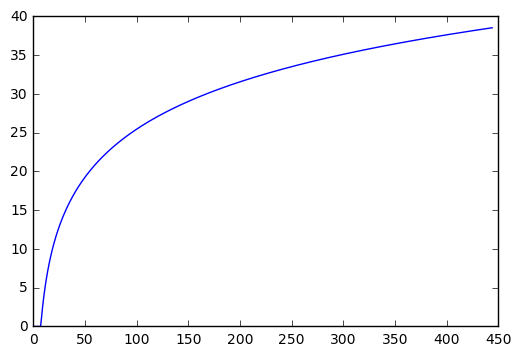

In [188]:
plt.plot(TVG)

In [190]:
a=np.transpose(npmatlib.repmat(TVG,pSize[1],1))

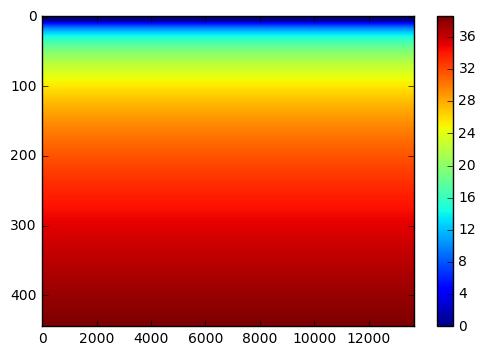

In [197]:
imgplot = plt.imshow(a,aspect="auto")
plt.colorbar()

In [198]:
cal_params[n]['absorptioncoefficient']

0.037440311

In [199]:
b=2*cal_params[n]['absorptioncoefficient']*np.transpose(npmatlib.repmat(rangeCorrected,pSize[1],1)) 

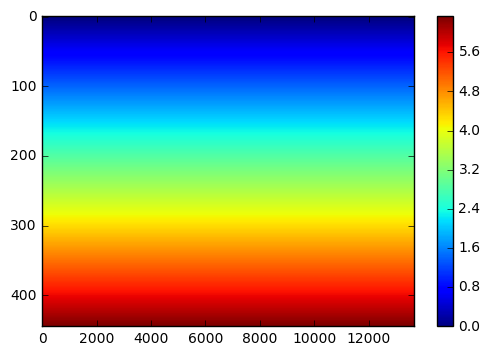

In [200]:
imgplot = plt.imshow(b,aspect="auto")
plt.colorbar()

In [201]:
np.max(b)

6.3287793245309594

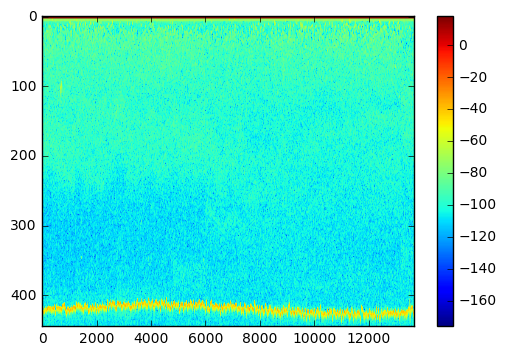

In [203]:
imgplot=plt.imshow(power_data_dict[n+1][::-1],aspect="auto")
plt.colorbar()

In [204]:
Sv[n+1] = power_data_dict[n+1][::-1] + np.transpose(npmatlib.repmat(TVG,pSize[1],1)) +\
             2*cal_params[n]['absorptioncoefficient']*np.transpose(npmatlib.repmat(rangeCorrected,pSize[1],1)) - CSv - Sac

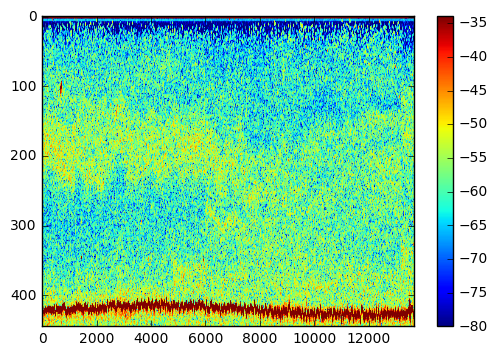

In [206]:
imgplot=plt.imshow(Sv[n+1],aspect="auto",vmax=-34,vmin=-80)
plt.colorbar()

In [207]:
def power2Sv(power_data_dict,cal_params):
    """
    Get Sv values from the power data
    All inputs are from the function `parse_echogram_file`
    Created based on function `readEKRaw_ConvertPower` in Matlab written by
    Rick Towler from the NOAA Alaska Fisheries Science Center
    """
    # set params
    tvgCorrectionFactor = 2.0   # default is to apply TVG correction with offset of 2

    # # transpose and flip power_data_dict
    # for channel in power_data_dict:
    #     # Transpose array data so we have time on the x-axis and depth on the y-axis
    #     power_data_dict[channel] = power_data_dict[channel].transpose()
    #     # reverse the Y axis (so depth is measured from the surface (at the top) to the ZPLS (at the bottom)
    #     power_data_dict[channel] = power_data_dict[channel][::-1]

    # Step through each frequency
    Sv = {}
    for n in range(len(power_data_dict)):
        # extract cal params
        f = cal_params[n]['frequency']
        c = cal_params[n]['soundvelocity']
        t = cal_params[n]['sampleinterval']
        alpha = cal_params[n]['absorptioncoefficient']
        G = cal_params[n]['gain']
        phi = cal_params[n]['equivalentbeamangle']
        pt = cal_params[n]['transmitpower']
        tau = cal_params[n]['pulselength']

        dR = c*t/2   # sample thickness
        wvlen = c/f  # wavelength

        # Calc gains
        CSv = 10 * np.log10((pt * (10**(G/10))**2 * wvlen**2 * c * tau * 10**(phi/10)) / (32 * math.pi**2))
        CSp = 10 * np.log10((pt * (10**(G/10))**2 * wvlen**2) / (16 * math.pi**2))

        # calculate Sa Correction
        idx = [i for i,dd in enumerate(cal_params[n]['pulselengthtable']) if dd==tau]
        Sac = 2 * cal_params[n]['sacorrectiontable'][idx]

        # determine number of samples in array
        pSize = power_data_dict[n+1].shape   # size(data.pings(n).power);

        # create range vector (in m)
        range_vec = np.arange(pSize[0]) * dR
            # data.pings(n).range = double((0:pSize(1) - 1) + ...
            #    double(data.pings(n).samplerange(1)) - 1)' * dR;

        # apply TVG Range correction -
        rangeCorrected = range_vec - (tvgCorrectionFactor * dR)
        rangeCorrected[rangeCorrected<0] = 0
            # rangeCorrected = data.pings(n).range - (tvgCorrectionFactor * dR);
            # rangeCorrected(rangeCorrected < 0) = 0;

        # update sound speed and absorption coefficient  **** Chu 4/2/2010 ****
        # data.pings(n).absorptioncoefficient(:) = alpha;
        # data.pings(n).soundvelocity(:) = c;

        # Calculate Sv TVG vector - ignore imag components of TVG
        idx_inf = rangeCorrected!=0
        TVG = np.empty(rangeCorrected.shape)
        TVG[rangeCorrected!=0] = np.real( 20*np.log10(rangeCorrected[rangeCorrected!=0]) )  # TVG = real(20 * log10(rangeCorrected));
        TVG[rangeCorrected==0] = 0
        # TVG = real(20 * log10(rangeCorrected));

        Sv[n+1] = power_data_dict[n+1][::-1] + np.transpose(npmatlib.repmat(TVG,pSize[1],1)) +\
             2*cal_params[n]['absorptioncoefficient']*np.transpose(npmatlib.repmat(rangeCorrected,pSize[1],1)) - CSv - Sac
        # data.pings(n).Sv = data.pings(n).power + ...
        #     repmat(TVG, 1, pSize(2)) + (2 * alpha * ...
        #     repmat(rangeCorrected, 1, pSize(2))) - CSv - Sac;

    return Sv

In [208]:
Sv = power2Sv(power_data_dict,cal_params)

In [209]:
Sv_mtx = get_Sv_mtx(Sv,freq)

In [210]:
import matplotlib.pylab as plt
from modest_image import imshow

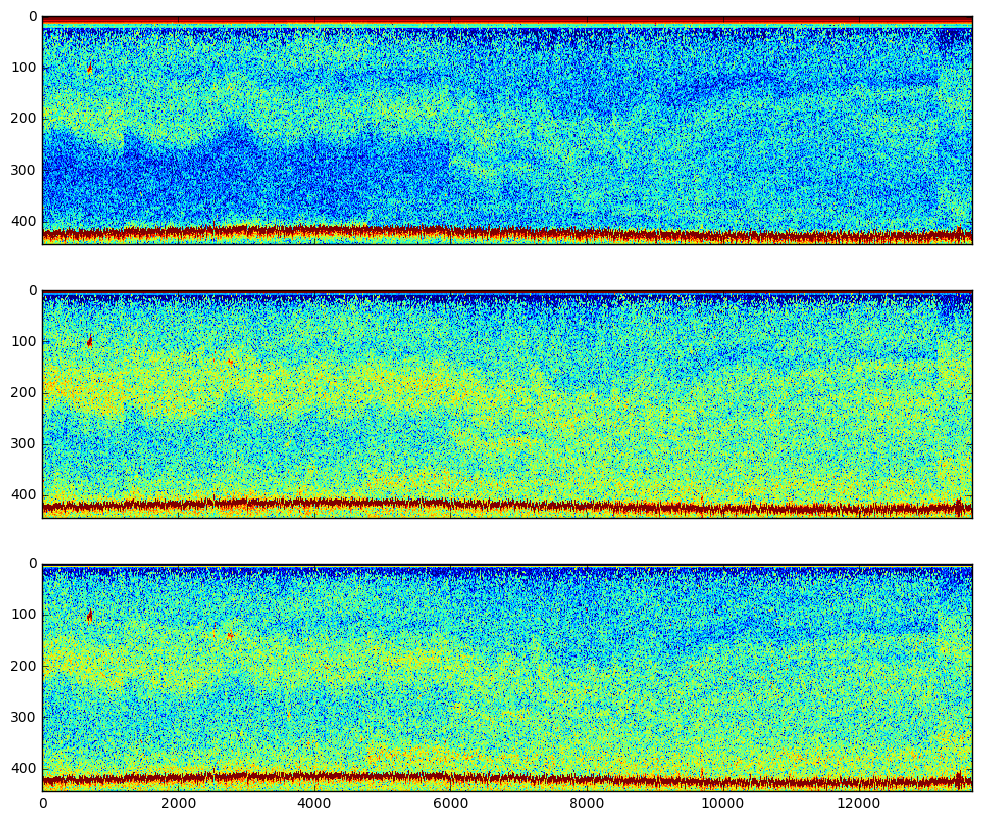

In [211]:
fig, ax = plt.subplots(3, sharex=True)
for ff in range(Sv_mtx.shape[0]):
    im = imshow(ax[ff],Sv_mtx[ff,:,:], interpolation='none', aspect='auto', cmap='jet',vmax=-34,vmin=-80)
fig.set_figwidth(12)
fig.set_figheight(10)

In [1]:
run concat_raw_to_hdf5.py

2017-02-02 17:26:36,150 INFO     mi.instrument.kut.ek60.ooicore.zplsc_b Begin processing echogram data: '/Users/wujung/ooi_data_80m/OOI-D20150901-T000000.raw'
2017-02-02 17:26:39,354 INFO     mi.instrument.kut.ek60.ooicore.zplsc_b Completed processing data. Generating echogram: '/Users/wujung/ooi_data_80m/OOI-D20150901-T000000.raw'
2017-02-02 17:26:46,059 INFO     mi.instrument.kut.ek60.ooicore.zplsc_b Completed generating echogram: '/Users/wujung/ooi_data_80m/OOI-D20150901-T000000.raw'
create new dataset
2017-02-02 17:26:47,148 INFO     mi.instrument.kut.ek60.ooicore.zplsc_b Begin processing echogram data: '/Users/wujung/ooi_data_80m/OOI-D20150901-T110828.raw'
2017-02-02 17:26:50,220 INFO     mi.instrument.kut.ek60.ooicore.zplsc_b Completed processing data. Generating echogram: '/Users/wujung/ooi_data_80m/OOI-D20150901-T110828.raw'
2017-02-02 17:26:56,157 INFO     mi.instrument.kut.ek60.ooicore.zplsc_b Completed generating echogram: '/Users/wujung/ooi_data_80m/OOI-D20150901-T110828.ra

In [2]:
h5_fname = '2015_0901-09_80m.h5'

In [3]:
import h5py

In [4]:
f = h5py.File(h5_fname,"r")

In [6]:
import matplotlib.pylab as plt
from modest_image import imshow
%matplotlib inline

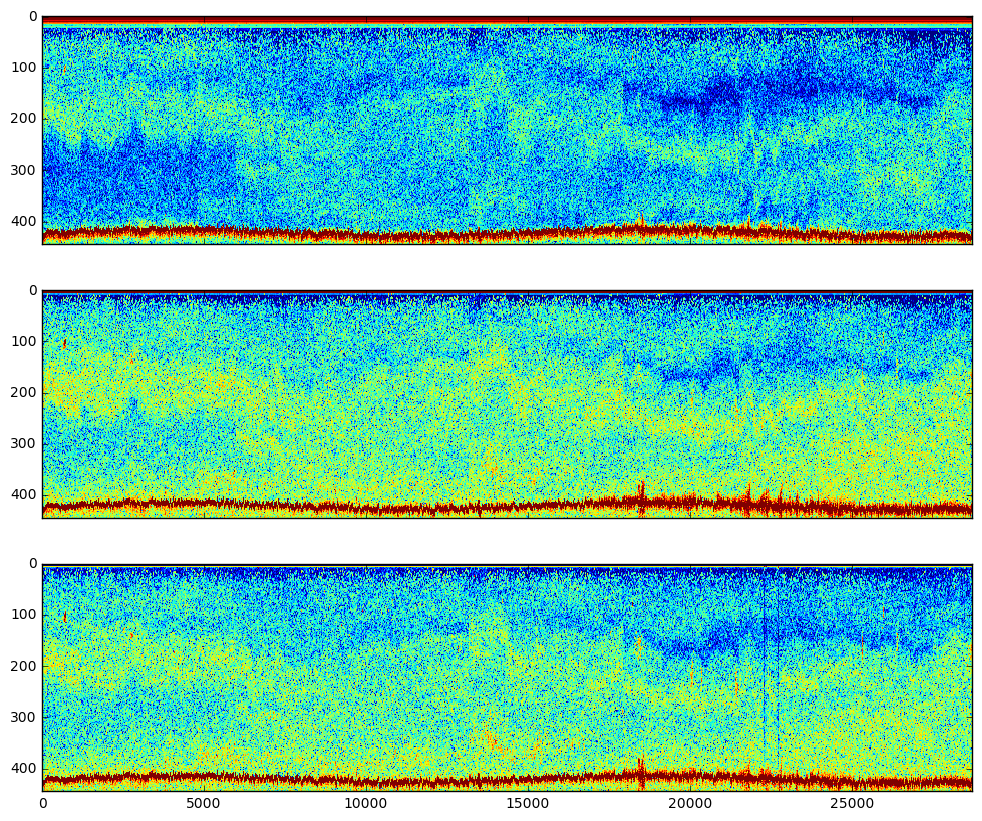

In [7]:
fig, ax = plt.subplots(3, sharex=True)
for freq in range(f['sonar_data'].shape[0]):
    im = imshow(ax[freq],f['sonar_data'][freq,:,:], interpolation='none', aspect='auto', cmap='jet',vmax=-34,vmin=-80)
fig.set_figwidth(12)
fig.set_figheight(10)

In [10]:
f.close()